A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

#***Solución A***

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sympy import Symbol
from scipy.misc import derivative
import datetime as dt

In [133]:
# Primero se lee el archivo JSON
archivo_json = "https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json" #Se guarda la ruta donde se encuentra el archivo JSON
archivo = pd.read_json(archivo_json) # Se lee el archivo JSON
df = pd.DataFrame(archivo) # Se convierte a un DataFrame
df

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


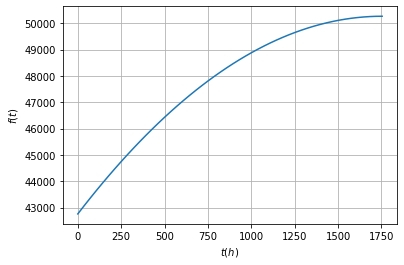

In [134]:
def curve(x,a,b,c):
  return a*x**2+b*x+c

l,le = optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])
a,b,c = l 

p = np.poly1d([a,b,c])
v = p.deriv()
tmax = v.roots[0]
t = np.linspace (0,tmax)

plt.plot (t,curve(t, a, b, c))
plt.xlabel('$t(h)$')
plt.ylabel('$f(t)$')
plt.grid()
plt.show()

In [135]:
q = np.poly1d([a, b, c],variable='t')
print(q)

           2
-0.002438 t + 8.552 t + 4.276e+04


Punto 1

Con este polinomio se interpreta como la ecuación de la cinematica
$$
\frac{a}{2}t^2+v_0t+x_0
$$
donde $v_0$ corresponde a la velocidad inicial, teniendo así que:

la velocidad inicial de incremento de seguidores es: $v_0=8.552 seguidores/horas$

punto 2

Para la aceleración hago uso de la misma ecuación cinematica del punto 1 y del polinomio obtenido con anterioridad teniendo que 
$$
\frac{a}{2}=-0.002438
$$
Teniendo entonces una desaceleración constante es: $a=-0.004876 seguidores/horas^2$

In [136]:
#Punto 3
# Como ya se tiene el polinomio lo que hago es hallar donde la derivada se hace 0, entonces primero derivo el polinomio
pp = p.deriv()
print(pp)


 
-0.004875 x + 8.552


In [137]:
# Luego se hallan las raices para ver donde se hace 0 como el resultado es dado para t, lo evaluo luego en en polinomio original 
t_max=pp.roots
r = q(t_max)
print ('El número máximo de seguidores que alcanzaría el perfil es:', r[0])

El número máximo de seguidores que alcanzaría el perfil es: 50262.136677663584


In [138]:
# Punto 4 

hr = float(t_max)
date = df['date_time'][0] + dt.timedelta(hours=hr)
fc = str(date)
print('La fecha donde alcanzará el máximo será:', fc)

La fecha donde alcanzará el máximo será: 2021-10-17 00:18:28.912936


-------------------------------
#***Solución B***

In [139]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [140]:
# Punto 1
# Primero creo la función
def T(alpha):
    sen=np.sin(alpha/2)

    return (2/np.pi)*integrate.quad(lambda theta:(1)/(np.sqrt(1-(sen**2)*(np.sin(theta)**2))),0,np.pi/2)[0] # Uso el método de la cuadratura para hallar la integral

In [141]:
# Creo un linspace con los ángulos enteros de 0° a 90°
x=np.linspace(0,90,91)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.])

In [142]:
result = np.zeros(91)
for i in range(0, 90+1):
  result[i]=T(np.deg2rad(x[i])) #En este punto debo convertir los grados recibidos del linspace anterior a radianes
print('El valor del cociente T/T_0 para cada ángulo entero entre 0° y 90° es:\n\n',result)

El valor del cociente T/T_0 para cada ángulo entero entre 0° y 90° es:

 [1.         1.00001904 1.00007616 1.00017137 1.0003047  1.00047617
 1.00068582 1.00093369 1.00121983 1.00154431 1.00190719 1.00230855
 1.00274847 1.00322704 1.00374438 1.00430058 1.00489577 1.00553006
 1.00620361 1.00691655 1.00766903 1.00846121 1.00929327 1.01016539
 1.01107775 1.01203055 1.013024   1.01405832 1.01513373 1.01625048
 1.0174088  1.01860895 1.01985121 1.02113584 1.02246314 1.02383341
 1.02524696 1.0267041  1.02820518 1.02975053 1.03134052 1.03297551
 1.03465589 1.03638204 1.03815439 1.03997334 1.04183934 1.04375283
 1.04571428 1.04772416 1.04978296 1.0518912  1.0540494  1.0562581
 1.05851786 1.06082924 1.06319285 1.06560929 1.0680792  1.07060321
 1.07318201 1.07581626 1.0785067  1.08125403 1.08405903 1.08692245
 1.08984511 1.09282782 1.09587144 1.09897683 1.10214491 1.10537659
 1.10867285 1.11203465 1.11546303 1.11895904 1.12252375 1.12615829
 1.1298638  1.13364148 1.13749256 1.1414183  1.14542001 1

In [143]:
#Punto 2
# Primero creo un Diccionario

dic={"alpha grados": x, "alpha radianes" : np.deg2rad(x), "T/T_0": result }

In [144]:
# Se crea el DataFrame
df = pd.DataFrame(dic)
df

,alpha grados,alpha radianes,T/T_0
0,0.0,0.000000,1.000000
1,1.0,0.017453,1.000019
2,2.0,0.034907,1.000076
3,3.0,0.052360,1.000171
4,4.0,0.069813,1.000305
...,...,...,...
86,86.0,1.500983,1.162214
87,87.0,1.518436,1.166617
88,88.0,1.535890,1.171105
89,89.0,1.553343,1.175679


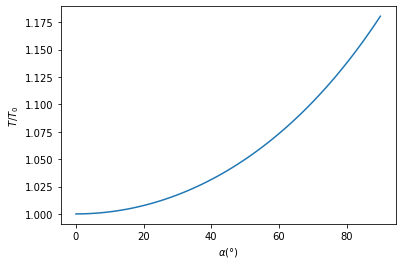

In [145]:
#Punto 3
# Se hace el gráfico de T/T_0 como función de alpha en grados

plt.plot(x,result)
plt.ylabel('${T}/{T_0} $ ')
plt.xlabel(r'$\alpha (°)$')
plt.show()

Punto 4

Cuando $\alpha=0$ se tiene que el cociente $T/T_0=1$ porque se tiene que $\lim_{\alpha \to 0}(T(\alpha))= T_0$ debido a que $T_0$ es para amplitudes pequeñas. 